<div class="alert alert-block alert-success">
       Jamis's Final Project
</div>

In [80]:
!pip install geoplot

     |████████████████████████████████| 8.9MB 1.1MB/s eta 0:00:01     |████████                        | 2.2MB 2.2MB/s eta 0:00:03     |██████████████▍                 | 4.0MB 2.6MB/s eta 0:00:02     |██████████████████▏             | 5.0MB 2.6MB/s eta 0:00:02     |█████████████████████           | 5.8MB 1.5MB/s eta 0:00:03
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 1.0MB/s eta 0:00:01     |███████████████████▉            | 133kB 1.0MB/s eta 0:00:01
  Created wheel for cartopy: filename=Cartopy-0.17.0-cp37-cp37m-linux_x86_64.whl size=9742487 sha256=f84a17afe1ea307885891dc5a009840da9a7e22320c8b97d58efde681e870968
  Stored in directory: /home/jovyan/.cache/pip/wheels/cd/cf/40/539f798f94e921e94fd376a5f9d213a6febe77754c0b187c73
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.0-cp37-none-any.whl size=32607 sha256=98ec0ea2efd7bee6ddcaed8cc3

In [99]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal.lib as lp
from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda
from scipy import stats
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from geoplot import utils
#import geoplot as gplt
#from geoplot import crs as gcrs
#import shapely

os.chdir('/home/jovyan/geog788p/jamis_MnM4SDS_project/')

In [100]:
# read in nasa plot trees shapefile
npt = gpd.read_file('./data/shapefiles/nasa_plot_trees.shp')
npt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 19 columns):
TAG          7805 non-null object
SPP          7805 non-null object
X_89         7805 non-null float64
Y_89         7805 non-null float64
TNSCT        7805 non-null int64
Ht_89        7803 non-null float64
DBH_89       7803 non-null float64
Cnpy_89      7803 non-null float64
Sts_89       7805 non-null object
DBH_10       5615 non-null float64
Cnpy_10      7395 non-null float64
DBH_15       3448 non-null float64
Sts_15       3514 non-null object
Ht_16        3385 non-null float64
BLC_16       3051 non-null float64
Cnpy_16      3379 non-null float64
Cored_15     329 non-null object
tnsct_val    7805 non-null float64
geometry     7805 non-null object
dtypes: float64(12), int64(1), object(6)
memory usage: 1.1+ MB


In [101]:
# add PFT designations 
npt['PFT'] = 'a'

# PFT 1
npt.loc[npt.SPP == 'ABBA', 'PFT'] = 'PFT_1'
npt.loc[npt.SPP == 'PIRU', 'PFT'] = 'PFT_1'
npt.loc[npt.SPP == 'THOC', 'PFT'] = 'PFT_1'
npt.loc[npt.SPP == 'TSCA', 'PFT'] = 'PFT_1'
# PFT 2
npt.loc[npt.SPP == 'PIST', 'PFT'] = 'PFT_2'
# PFT 3
npt.loc[npt.SPP == 'ACRU', 'PFT'] = 'PFT_3'
# PFT 6
npt.loc[npt.SPP == 'BEAL', 'PFT'] = 'PFT_6'
# PFT 7
npt.loc[npt.SPP == 'BEPA', 'PFT'] = 'PFT_7'
# PFT 8
npt.loc[npt.SPP == 'UNSP', 'PFT'] = 'PFT_8'

Text(0.5, 1.0, 'Howland Forest: NASA Plot Tree Species')

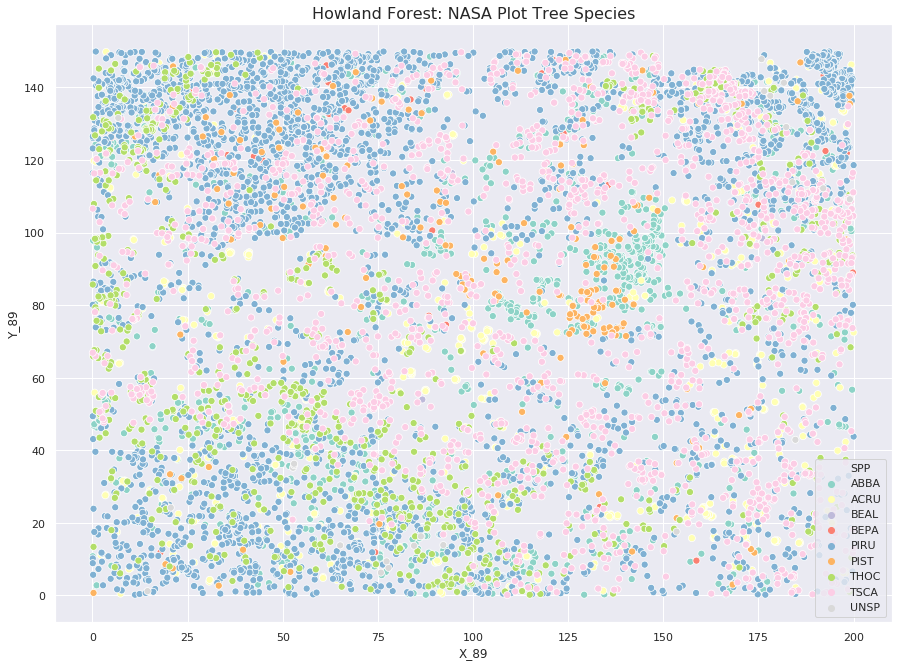

In [102]:
sns.set()
fig, ax = plt.subplots(figsize=(15,11))
ax = sns.scatterplot(x="X_89", y="Y_89",
                     hue="SPP",# size="DBH_15",
                     palette='Set3', s=50,
                     data=npt)
ax.set_title("Howland Forest: NASA Plot Tree Species", fontsize=16)

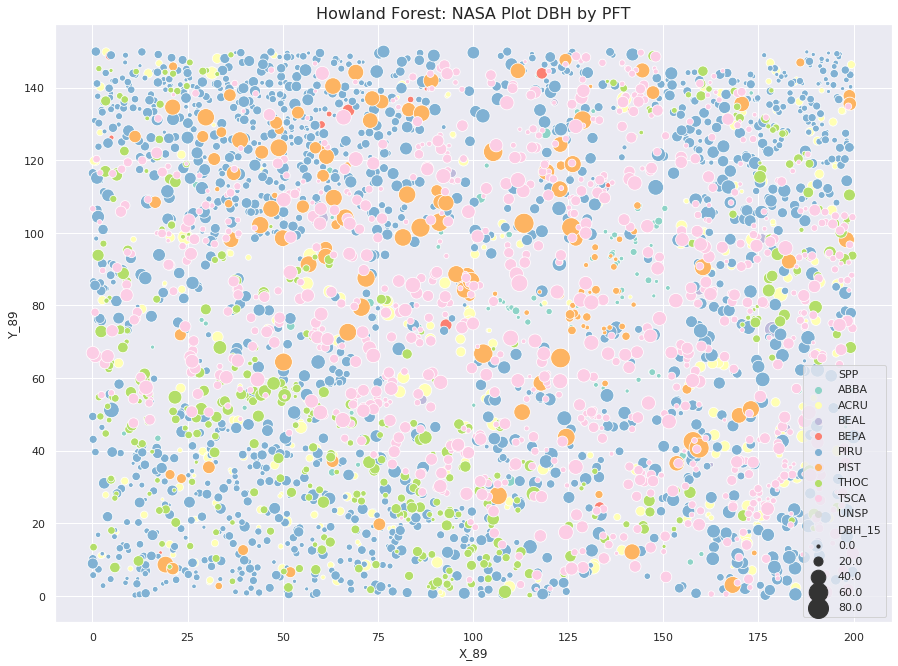

In [103]:
sns.set()
fig, ax = plt.subplots(figsize=(15,11))
ax = sns.scatterplot(x="X_89", y="Y_89",
                     hue="SPP", size="DBH_15",
                     palette='Set3', sizes=(10, 400),
                     data=npt)
ax.set_title("Howland Forest: NASA Plot DBH by PFT", fontsize=16)

fig.savefig('./figures/update1/CanopyDBH_PointPlot.png', bbox_inches='tight')

Text(0.5, 1.0, 'Howland Forest: NASA Plot PLANT FUNCTIONAL TYPES')

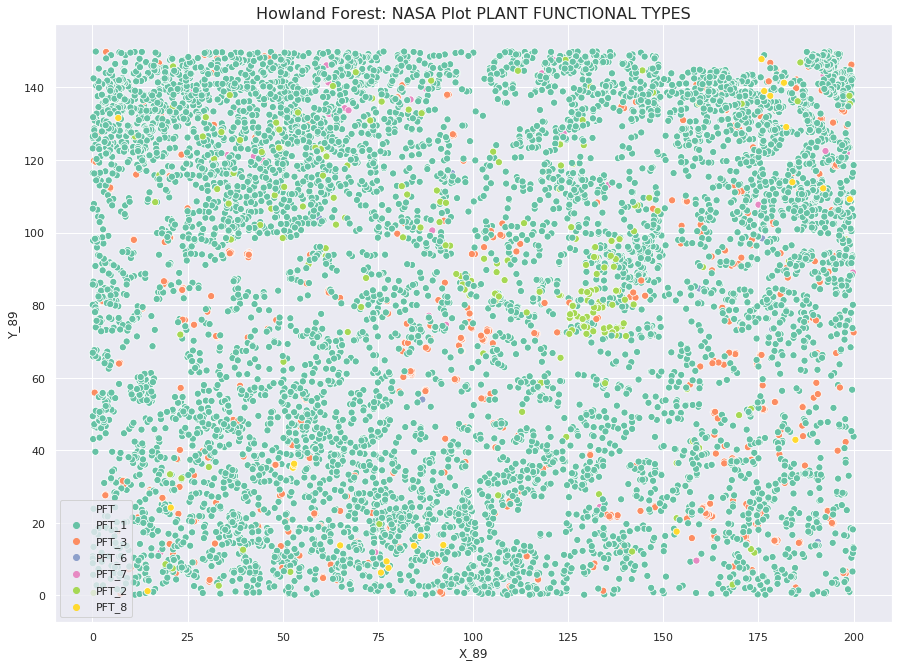

In [104]:
sns.set()
fig, ax = plt.subplots(figsize=(15,11))
ax = sns.scatterplot(x="X_89", y="Y_89",
                     hue="PFT",# size="DBH_15",
                     palette='Set2', s=50,
                     data=npt)
ax.set_title("Howland Forest: NASA Plot PLANT FUNCTIONAL TYPES", fontsize=16)


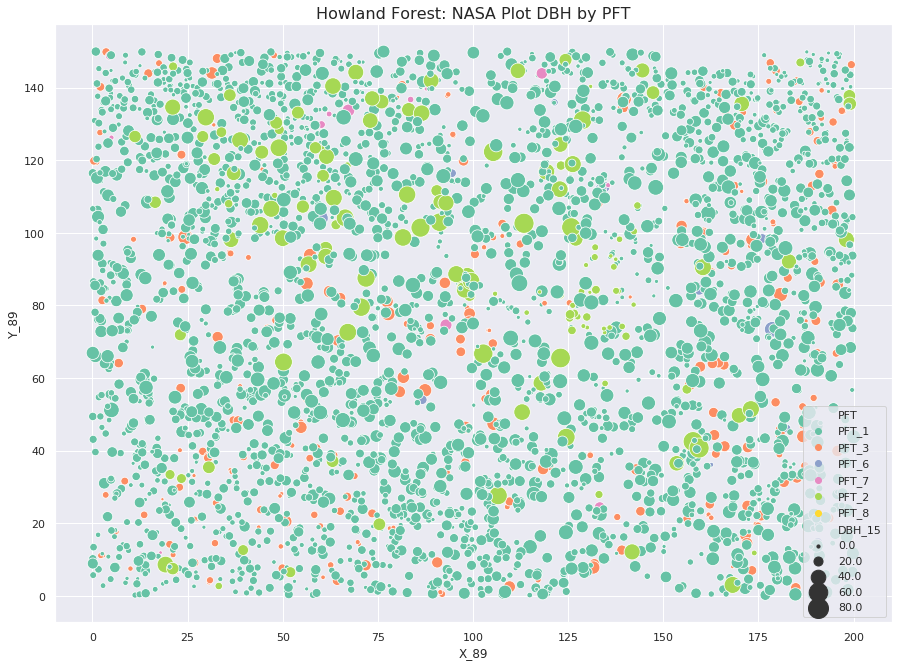

In [105]:
sns.set()
fig, ax = plt.subplots(figsize=(15,11))
ax = sns.scatterplot(x="X_89", y="Y_89",
                     hue="PFT", size="DBH_15",
                     palette='Set2', sizes=(10, 400),
                     data=npt)
ax.set_title("Howland Forest: NASA Plot DBH by PFT", fontsize=16)

fig.savefig('./figures/update1/CanopyDBH_PointPlot.png', bbox_inches='tight')

Text(0.5, 1.0, 'Howland Forest: NASA Plot Canopy type')

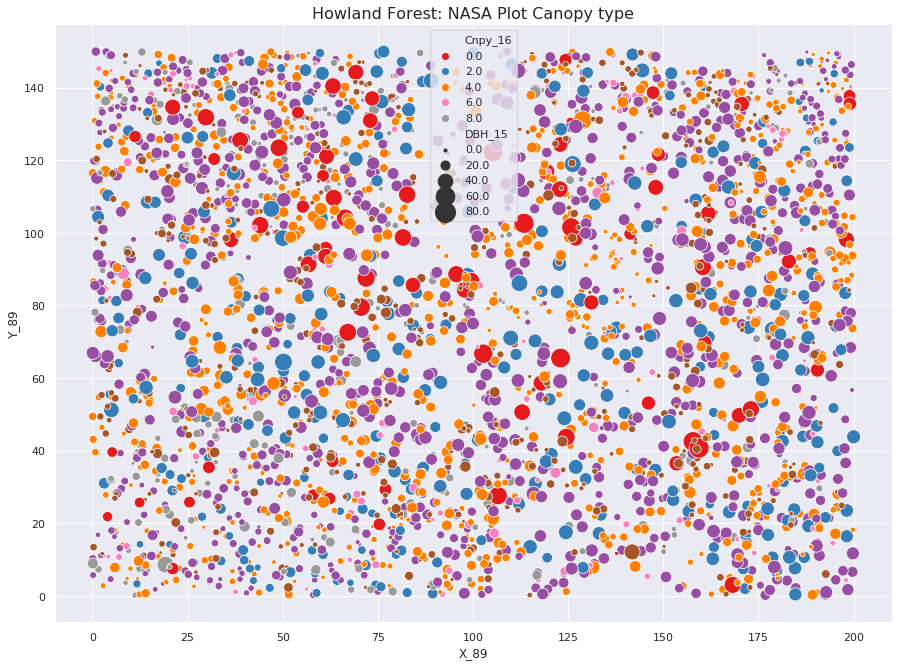

In [106]:
sns.set()
fig, ax = plt.subplots(figsize=(15,11))
ax = sns.scatterplot(x="X_89", y="Y_89",
                     hue="Cnpy_16", size="DBH_15",
                     palette='Set1', sizes=(10, 400),
                     data=npt)
ax.set_title("Howland Forest: NASA Plot Canopy type", fontsize=16)

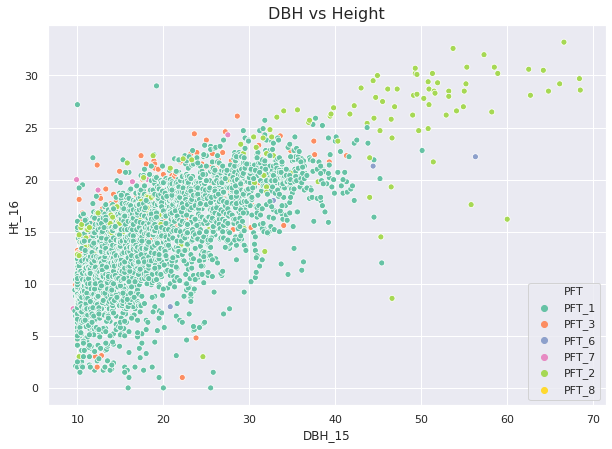

In [107]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.scatterplot(x='DBH_15',y='Ht_16', data=npt, hue='PFT', palette='Set2')
ax.set_title("DBH vs Height", fontsize=16)

fig.savefig('./figures/update1/Height_DBH_ScatterPlot.png', bbox_inches='tight')

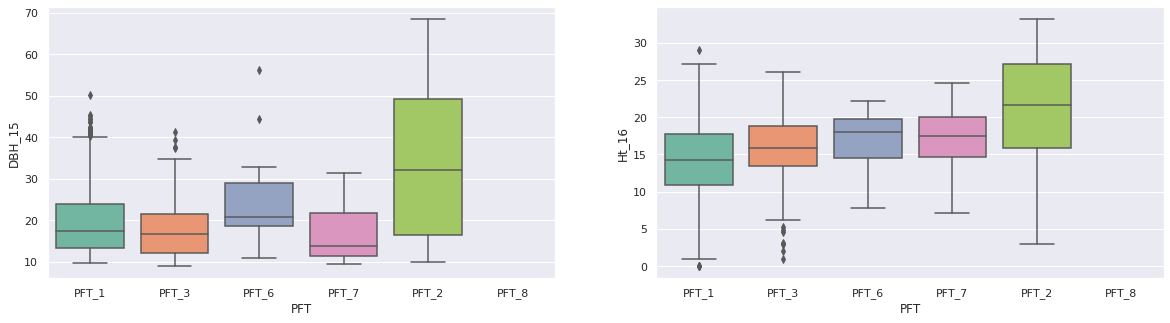

In [108]:
f,ax = plt.subplots(1,2,figsize=(20,5))

#ax = sns.boxplot(x='Cnpy_16',y='DBH_15', data=npt)
sns.boxplot(x='PFT',y='DBH_15', data=npt, ax=ax[0], palette='Set2')
sns.boxplot(x='PFT',y='Ht_16', data=npt, ax=ax[1], palette='Set2')


f.savefig('./figures/update1/Height_and_DBH_by_Canopy_BoxPlot.png', bbox_inches='tight')

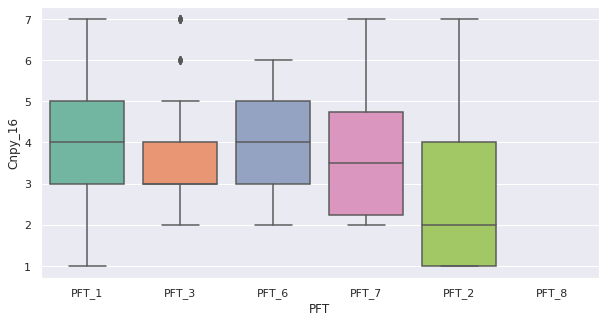

In [109]:
f,ax = plt.subplots(1,figsize=(10,5))

sns.boxplot(x='PFT',y='Cnpy_16', data=npt, ax=ax, palette='Set2')

f.savefig('./figures/update1/Canopy_by_Species_BoxPlot.png', bbox_inches='tight')

In [112]:
np16 = npt[['SPP','PFT','Ht_16', 'DBH_15','Cnpy_16','BLC_16','TNSCT','tnsct_val','geometry']]
np.count_nonzero(np16.isnull()) 

17957

In [113]:
np16 = np16.dropna()
np.count_nonzero(np16.isnull()) 

0

In [116]:
# change transect value to integer
np16['tnsct_val'] = np16['tnsct_val'].astype('int')
np16.head(10)

SPP    PFT  Ht_16  DBH_15  Cnpy_16  BLC_16  TNSCT  tnsct_val  \
34  ABBA  PFT_1    9.8    10.0      5.0     6.3    145        668   
35  ABBA  PFT_1   12.2    10.0      5.0     6.5    145        628   
36  ABBA  PFT_1   12.4    10.0      4.0     8.6    145        547   
37  ABBA  PFT_1   15.2    10.0      4.0     9.2    110        782   
38  ABBA  PFT_1    9.5    10.0      6.0     7.6     85       1382   
39  ABBA  PFT_1   10.4    10.1      3.0     6.4     15        967   
40  ABBA  PFT_1   12.9    10.2      4.0     9.7    135        545   
41  ABBA  PFT_1    2.4    10.2      4.0     7.7    105        742   
42  ABBA  PFT_1   10.7    10.2      4.0     6.5    100        982   
43  ABBA  PFT_1    8.9    10.2      6.0     6.3     70       1420   

                                     geometry  
34  POINT (520347.364717069 5005873.82007849)  
35  POINT (520346.699245899 5005877.70349383)  
36  POINT (520341.965341455 5005886.78218866)  
37   POINT (520314.28239333 5005862.21299322)  
38  POINT (520310.016038797 5005797.60433306)  
39  POINT (520222.360762739 5005838.15189644)  
40  POINT (520331.005338424 5005886.98970536)  
41   POINT (520311.03953329 5005863.95231602)  
42  POINT (520310.952249848 5005837.44872484)  
43  POINT (520300.309907391 5005791.13124129)

In [61]:
# variables to use in model
vars16 = ['DBH_15', 'Ht_16', 'BLC_16']


# run model
m16 = spreg.OLS(np16[['Cnpy_16']].values, np16[vars16].values, name_y='Cnpy_16', name_x=vars16)

print(m16.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     Cnpy_16                Number of Observations:        2991
Mean dependent var  :      3.6917                Number of Variables   :           4
S.D. dependent var  :      1.1341                Degrees of Freedom    :        2987
R-squared           :      0.5365
Adjusted R-squared  :      0.5360
Sum squared residual:    1782.703                F-statistic           :   1152.2628
Sigma-square        :       0.597                Prob(F-statistic)     :           0
S.E. of regression  :       0.773                Log likelihood        :   -3470.159
Sigma-square ML     :       0.596                Akaike info criterion :    6948.317
S.E of regression ML:      0.7720                Schwarz criterion     :    6972.331

-----------------------------------------------------------------------------

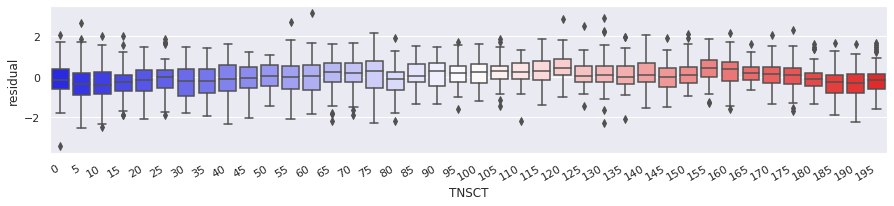

In [118]:
np16['residual'] = m16.u
medians = np16.groupby("TNSCT").residual.median().to_frame('hood_residual')

f = plt.figure(figsize=(15,3))
ax = plt.gca()
sns.boxplot('TNSCT', 'residual', ax = ax,
                data=np16.merge(medians, how='left',
                              left_on='TNSCT',
                              right_index=True)
                   .sort_values('hood_residual'), palette='bwr')
f.autofmt_xdate()
plt.show()

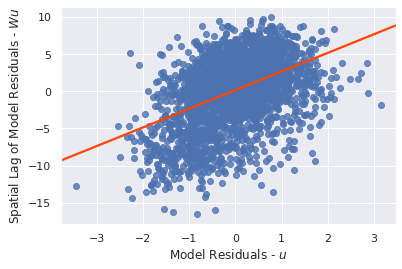

In [119]:
# look at 10 nearest neighbors
knn = weights.KNN.from_dataframe(np16, k=10)

lag_residual = weights.spatial_lag.lag_spatial(knn, m16.u)
ax = sns.regplot(m16.u.flatten(), lag_residual.flatten(), 
                     line_kws=dict(color='orangered'),
                     ci=None)
ax.set_xlabel('Model Residuals - $u$')
ax.set_ylabel('Spatial Lag of Model Residuals - $W u$');

In [123]:
# spatial fixed effects by transcript
np16['tnsct_val'] = np16['tnsct_val'].astype(str)
fe_t = 'Cnpy_16 ~ ' + ' + '.join(vars16) + ' + tnsct_val - 1'
print(fe_t)

Cnpy_16 ~ DBH_15 + Ht_16 + BLC_16 + tnsct_val - 1


In [124]:
# fixed effects by transect
m16_fe_t = sm.ols(fe_t, data=np16).fit()
print(m16_fe_t.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.697     
Dependent Variable: Cnpy_16          AIC:                6461.5213 
Date:               2019-11-20 14:03 BIC:                12572.9449
No. Observations:   2991             Log-Likelihood:     -2212.8   
Df Model:           1017             F-statistic:        7.762     
Df Residuals:       1973             Prob (F-statistic): 0.00      
R-squared:          0.800            Scale:              0.38976   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
tnsct_val[1005]     6.8835   0.2819  24.4160 0.0000  6.3306  7.4364
tnsct_val[1006]     6.8673   0.3155  21.7653 0.0000  6.2485  7.4861
tnsct_val[1009]     7.2209   0.4458  16.1995 0.0000  6.3467  8.0951
tnsct_val[101]      7.4379   0.3219  23.1094 0.0000  6.8067  8.069

In [ ]:
# fixed effects by species
np16['SPP'] = np16['SPP'].astype(str)
fe_s = 'Cnpy_16 ~ ' + ' + '.join(vars16) + ' + SPP - 1'
print(fe_s)

In [75]:
# fixed effects by Species
m16_fe_s = sm.ols(fe_s, data=np16).fit()
print(m16_fe_s.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.613    
Dependent Variable: Cnpy_16          AIC:                6415.6100
Date:               2019-11-20 12:41 BIC:                6481.6470
No. Observations:   2991             Log-Likelihood:     -3196.8  
Df Model:           10               F-statistic:        473.8    
Df Residuals:       2980             Prob (F-statistic): 0.00     
R-squared:          0.614            Scale:              0.49829  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
SPP[ABBA]      5.6659    0.1011   56.0421  0.0000   5.4677   5.8641
SPP[ACRU]      5.3236    0.0686   77.5575  0.0000   5.1890   5.4582
SPP[BEAL]      6.4231    0.2032   31.6056  0.0000   6.0246   6.8216
SPP[BEPA]      5.4277    0.2127   25.5152  0.0000   5.0106   5.8448
SPP[PI

In [ ]:
# fixed effects by PFT
np16['SPP'] = np16['SPP'].astype(str)
fe_p = 'Cnpy_16 ~ ' + ' + '.join(vars16) + ' + PFT - 1'
print(fe_p)

In [77]:
# fixed effects by Species
m16_fe_p = sm.ols(fe_p, data=np16).fit()
print(m16_fe_p.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.555    
Dependent Variable: Cnpy_16          AIC:                6826.0867
Date:               2019-11-20 12:42 BIC:                6874.1136
No. Observations:   2991             Log-Likelihood:     -3405.0  
Df Model:           7                F-statistic:        534.1    
Df Residuals:       2983             Prob (F-statistic): 0.00     
R-squared:          0.556            Scale:              0.57216  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
PFT[PFT_1]     6.2303    0.0498  125.1004  0.0000   6.1326   6.3279
PFT[PFT_2]     6.1541    0.0958   64.2152  0.0000   5.9661   6.3420
PFT[PFT_3]     5.6758    0.0697   81.4184  0.0000   5.5391   5.8125
PFT[PFT_6]     6.7043    0.2168   30.9174  0.0000   6.2791   7.1294
PFT[PF

In [78]:
c16 = np16['Cnpy_16'].astype(int)

knn = weights.KNN.from_dataframe(np16, k=10)
c16_lag = weights.spatial_lag.lag_spatial(knn, c16)

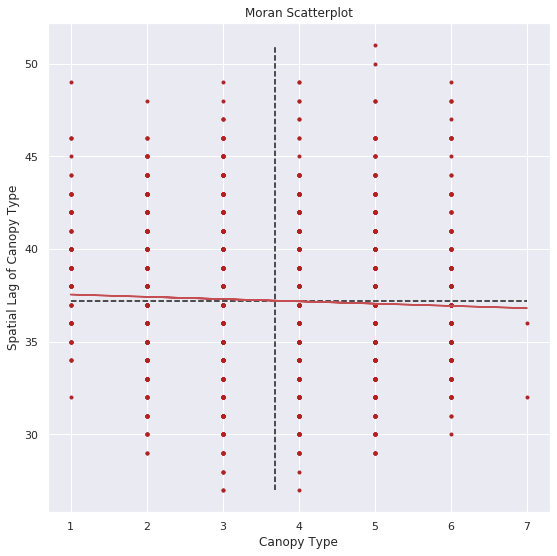

In [79]:
b, a = np.polyfit(c16, c16_lag, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(c16, c16_lag, '.', color='firebrick')

 # dashed vert at mean 
plt.vlines(c16.mean(), c16_lag.min(), c16_lag.max(), linestyle='--')
 # dashed horizontal at mean of lagged 
plt.hlines(c16_lag.mean(), c16.min(), c16.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(c16, a + b*c16, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Canopy Type')
plt.xlabel('Canopy Type')
plt.show()

In [78]:
from pysal.explore import esda
from pysal.viz.splot import esda as esdaplot

/opt/conda/lib/python3.7/site-packages/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/opt/conda/lib/python3.7/site-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


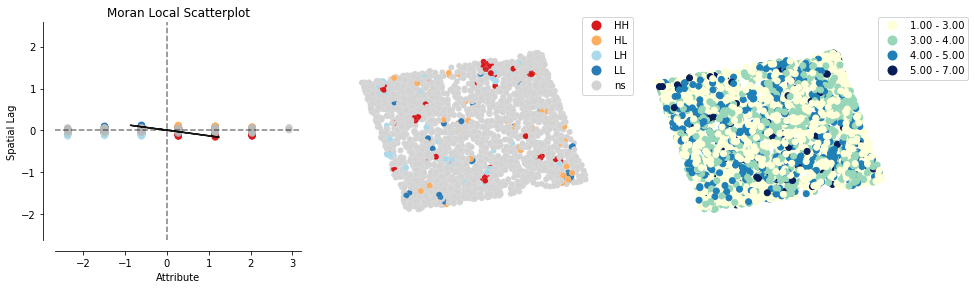

In [79]:
lisa = esda.Moran_Local(np16["Cnpy_16"], knn)
esdaplot.plot_local_autocorrelation(lisa, np16, "Cnpy_16");

In [81]:
# read in transects

tnsct = gpd.read_file('./data/shapefiles/nasa_plot_tnsct.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
layer       1600 non-null float64
geometry    1600 non-null object
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [82]:
tnsct.head()

layer                                           geometry
0    1.0  POLYGON ((520180.098031505 5005944.995921, 520...
1    1.0  POLYGON ((520186.237167005 5005944.995921, 520...
2    1.0  POLYGON ((520192.3763025049 5005944.995921, 52...
3    1.0  POLYGON ((520198.5154380049 5005944.995921, 52...
4    1.0  POLYGON ((520204.6545735048 5005944.995921, 52...

Text(0.5, 1, 'Nasa Plot Transects ')

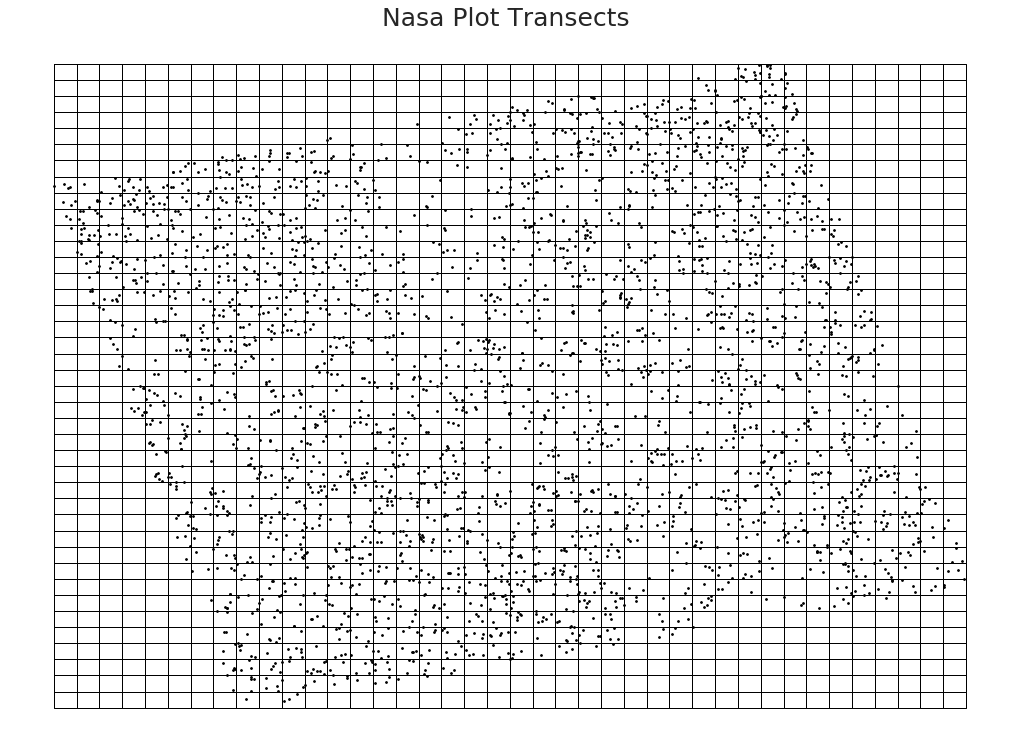

In [98]:
# create figure and axes
f,ax = plt.subplots(1,1,figsize=(18,18))


# plot transects
tnsct.plot(ax=ax, color='white', linewidth=1, edgecolor='black')
# remove axis
ax.axis('off')

# add tree locations
np16.plot(ax=ax, color='black', markersize=3);

# add a title
ax.set_title('Nasa Plot Transects ', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
